In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from cosinorage.dataloaders import DataLoader
from cosinorage.features import WearableFeatures

%load_ext autoreload
%autoreload 2

## Raw Accelerometer Data obtained from Smartwatch

In [2]:
reload_smartwatch_p = False

In [3]:
preprocess_args = {
    'autocalib_tol': 10e-15,
    'autocalib_max_iter': 500,
    'autocalib_epoch_size': 10,
    'filter_type': 'lowpass',
    'filter_cutoff': 2
}

In [4]:
if reload_smartwatch_p:
    smartwatch_loader_p = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=True, preprocess_args=preprocess_args)
    smartwatch_loader_p.load_data(verbose=True)
    with open("smartwatch_loader_p.pkl", "wb") as file:
        pickle.dump(smartwatch_loader_p, file)
else:
    with open("smartwatch_loader_p.pkl", "rb") as file:
        smartwatch_loader_p = pickle.load(file)

100%|██████████| 479/479 [00:00<00:00, 184369.24it/s]


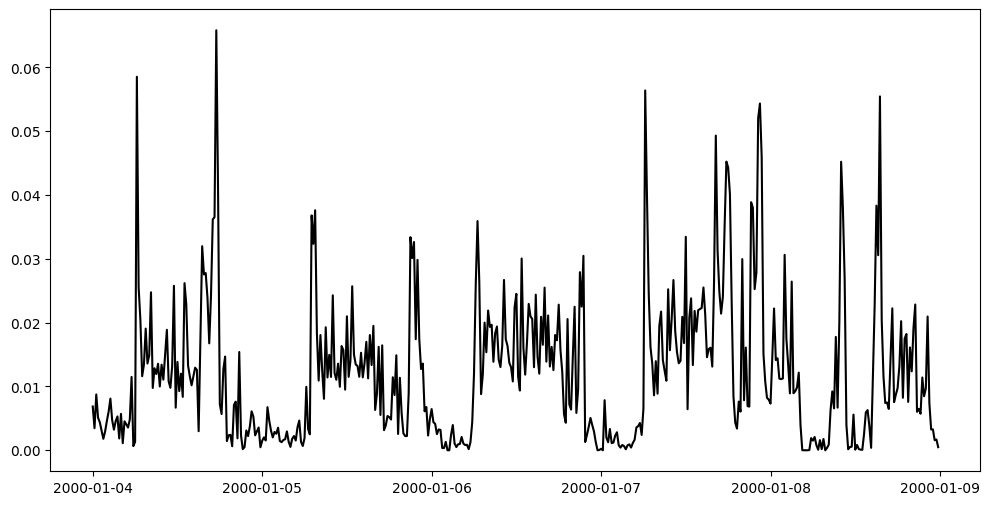

In [5]:
smartwatch_loader_p.plot_orig_enmo()

100%|██████████| 7199/7199 [00:00<00:00, 277161.40it/s]


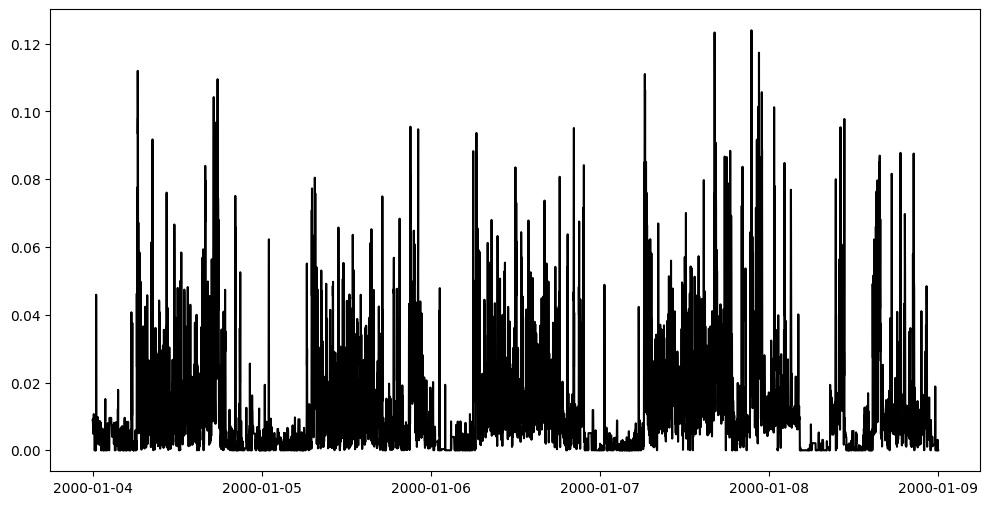

In [6]:
smartwatch_loader_p.plot_enmo()

In [7]:
smartwatch_loader_p.get_meta_data()

{'initial calibration error': 0.019900845583211396,
 'final calibration error': 0.00426933094260819,
 'offset': array([ 0.0280229 , -0.04103817, -0.01399065]),
 'scale': array([0.99644409, 0.99894598, 0.99920414]),
 'total time': 431999.9875,
 'wear time': 426600.0,
 'non-wear time': 5399.987499999988}

In [8]:
data = smartwatch_loader_p.get_acc_data()
data.head()

,X,Y,Z,X_raw,Y_raw,Z_raw,wear,ENMO
TIMESTAMP,,,,,,,,
2000-01-04 00:00:00.000000,-0.705773,0.008862,0.715846,-0.736,0.050,0.730,1.0,0.005300
2000-01-04 00:00:00.012500,-0.705737,0.009688,0.716148,-0.736,0.056,0.730,1.0,0.005498
2000-01-04 00:00:00.025000,-0.705709,0.010496,0.716456,-0.739,0.050,0.730,1.0,0.005706
2000-01-04 00:00:00.037500,-0.705686,0.011277,0.716761,-0.739,0.056,0.736,1.0,0.005916
2000-01-04 00:00:00.050000,-0.705666,0.012020,0.717055,-0.739,0.056,0.739,1.0,0.006120


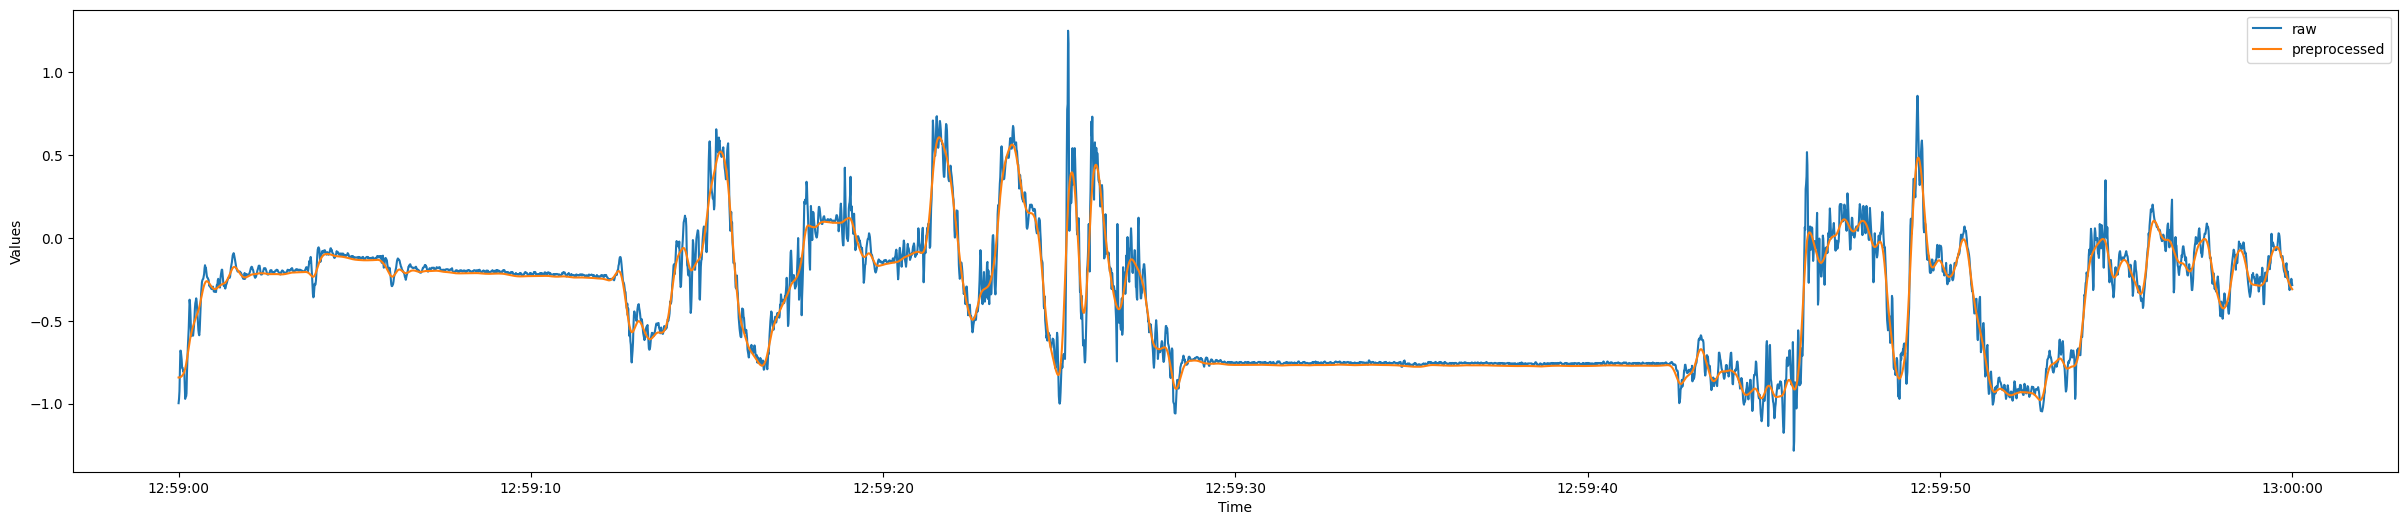

In [9]:
import pandas as pd

# Ensure the index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Select the data for the specified date from 12:00 to 13:00
time_start = pd.Timestamp('2000-01-04 12:59:00')
time_end = pd.Timestamp('2000-01-04 13:00:00')
selected_data = data[(data.index >= time_start) & (data.index <= time_end)]

# Plot raw and preprocessed data
plt.figure(figsize=(30, 6))
plt.plot(selected_data['Z_raw'], label='raw')
plt.plot(selected_data['Z'], label='preprocessed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()



/var/folders/wl/n18csb_91230dq8v__mxqxxr0000gn/T/ipykernel_28192/2004025123.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


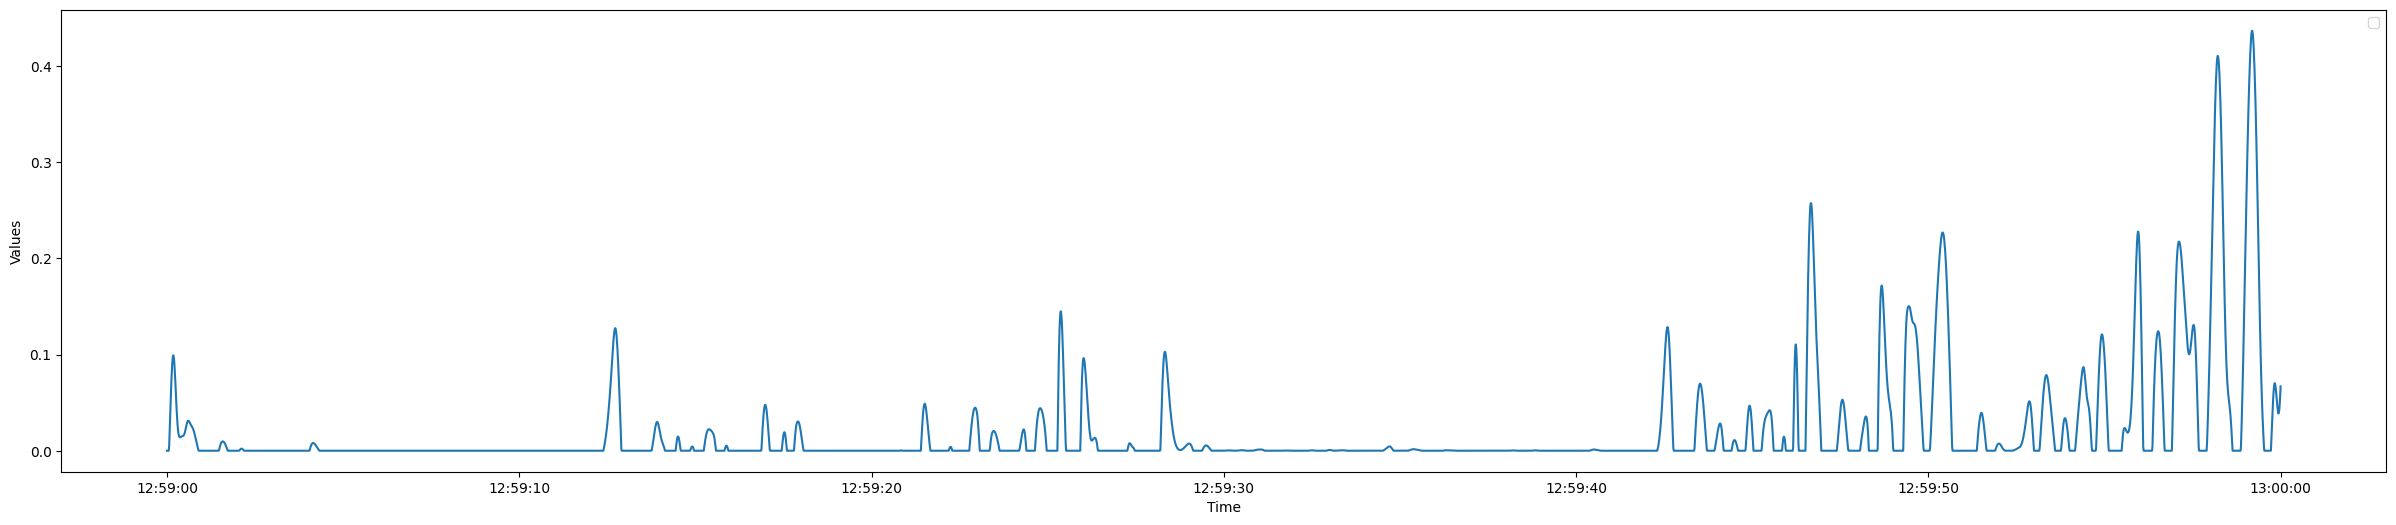

In [10]:
plt.figure(figsize=(30, 6))
plt.plot(selected_data['ENMO'])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

In [11]:
reload_smartwatch = False

In [12]:
if reload_smartwatch:
    smartwatch_loader = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=False)
    smartwatch_loader.load_data(verbose=True)
    with open("smartwatch_loader.pkl", "wb") as file:
        pickle.dump(smartwatch_loader, file)
else:
    with open("smartwatch_loader.pkl", "rb") as file:
        smartwatch_loader = pickle.load(file)

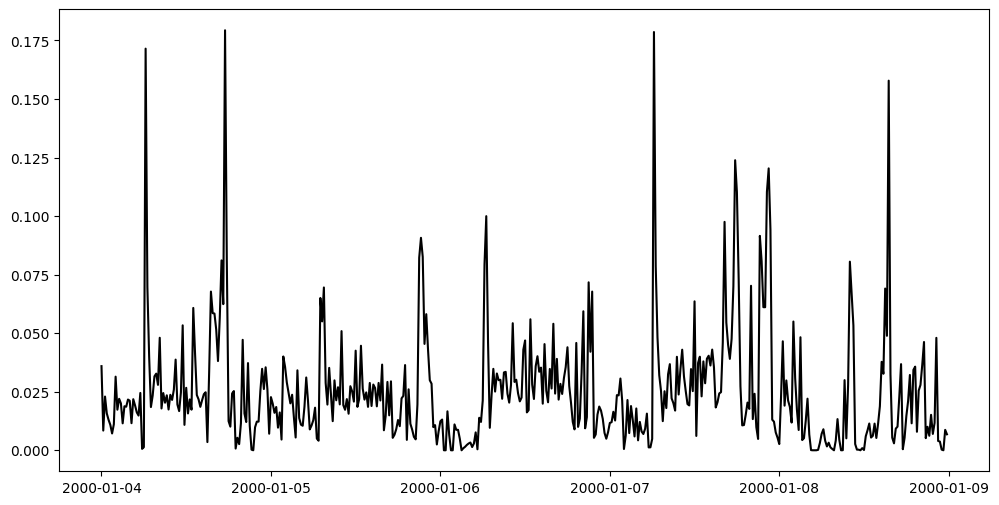

In [13]:
smartwatch_loader.plot_orig_enmo(wear=False)

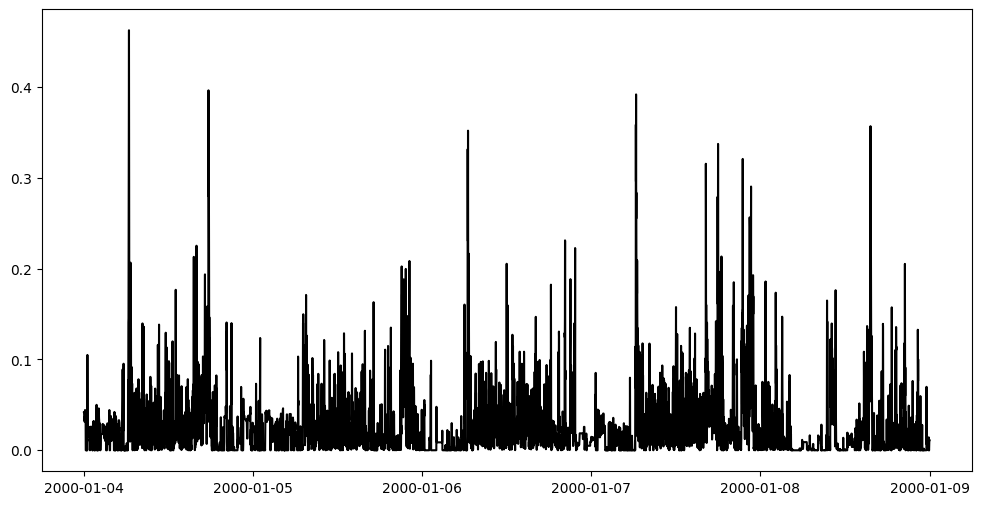

In [14]:
smartwatch_loader.plot_enmo()


In [15]:
smartwatch_loader.get_meta_data()

{}

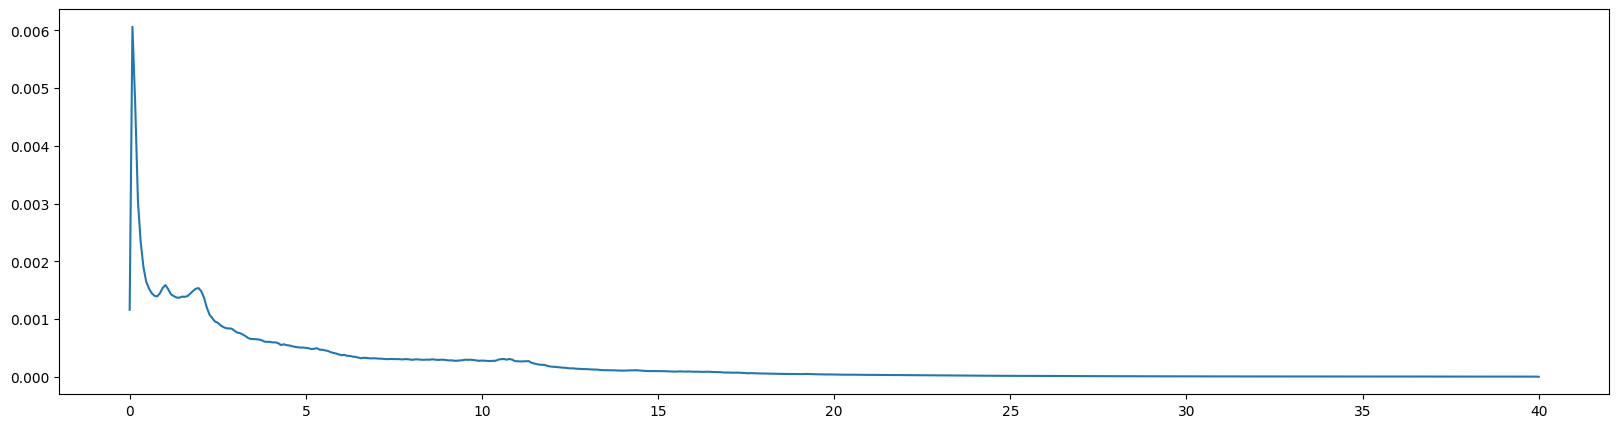

In [16]:
smartwatch_loader.plot_orig_enmo_freq()

## Compute features

In [17]:
preprocessed_features = True
if preprocessed_features:
    features = WearableFeatures(smartwatch_loader_p)
else:
    features = WearableFeatures(smartwatch_loader)
features.run()

/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/utils/cosinor_analysis.py:61: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  fitted_vals_df = pd.concat([fitted_vals_df, model.fittedvalues], ignore_index=False)


In [18]:
features.get_all()

,MESOR,amplitude,acrophase,acrophase_time,IV,IS,RA,M10,M10_start,L5,L5_start,SB,LIPA,MVPA,TST,WASO,PTA,SRI
2000-01-04,0.011726,0.007695,-2.756167,808.333154,0.655179,0.274790,0.782790,0.020305,17,0.002474,21,2.883333,13.283333,7.833333,563,847.0,0.390972,NaN
2000-01-05,0.010605,0.004664,-2.772493,804.591478,0.770409,0.382073,0.781297,0.018173,7,0.002231,4,2.216667,14.066667,7.716667,628,812.0,0.436111,49.027778
2000-01-06,0.012006,0.008341,-2.756012,808.368616,0.747490,0.346415,0.871326,0.018976,6,0.001305,2,3.883333,10.516667,9.600000,552,888.0,0.383333,61.944444
2000-01-07,0.016639,0.009112,-2.084013,962.379442,0.685835,0.250204,0.898978,0.028080,22,0.001494,3,2.500000,9.566667,11.933333,464,976.0,0.322222,74.166667
2000-01-08,0.010239,0.004095,-1.473402,1102.321240,0.512672,0.336331,0.904318,0.017933,15,0.000901,12,4.883333,12.650000,6.466667,865,575.0,0.600694,-25.694444


In [19]:
features.get_enmo_data()

,ENMO,wear,date,cosinor_fitted,sleep_predictions
TIMESTAMP,,,,,
2000-01-04 00:00:00,0.008956,1.0,2000-01-04,0.004583,1
2000-01-04 00:01:00,0.009141,1.0,2000-01-04,0.004570,1
2000-01-04 00:02:00,0.007170,1.0,2000-01-04,0.004558,1
2000-01-04 00:03:00,0.004886,1.0,2000-01-04,0.004546,1
2000-01-04 00:04:00,0.004886,1.0,2000-01-04,0.004534,1
...,...,...,...,...,...
2000-01-08 23:55:00,0.002130,1.0,2000-01-08,0.010709,0
2000-01-08 23:56:00,0.000000,1.0,2000-01-08,0.010691,0
2000-01-08 23:57:00,0.000503,1.0,2000-01-08,0.010673,0


/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/features.py:233: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  minutes = np.arange(0, 1440)


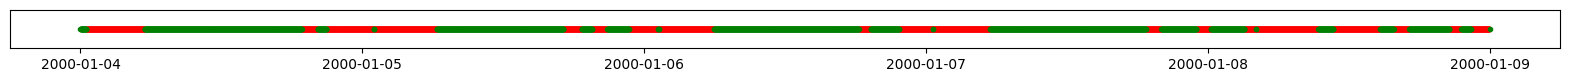

In [30]:
features.plot_sleep_predictions()

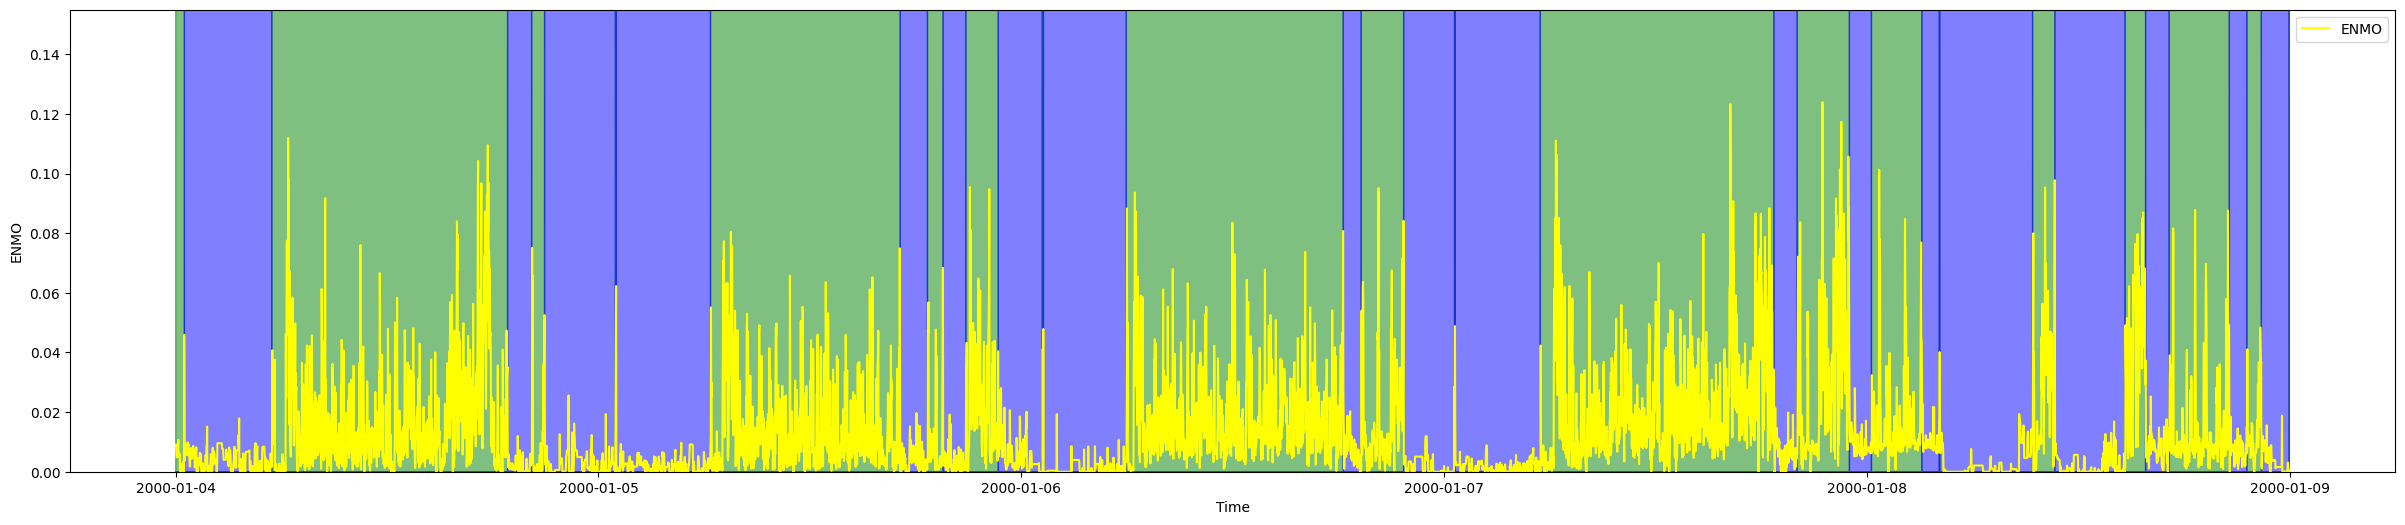

In [32]:
features.plot_sleep_predictions(simple=False, start_date=pd.Timestamp('2000-01-04 12:59:00'), end_date=pd.Timestamp('2000-01-04 13:00:00'))

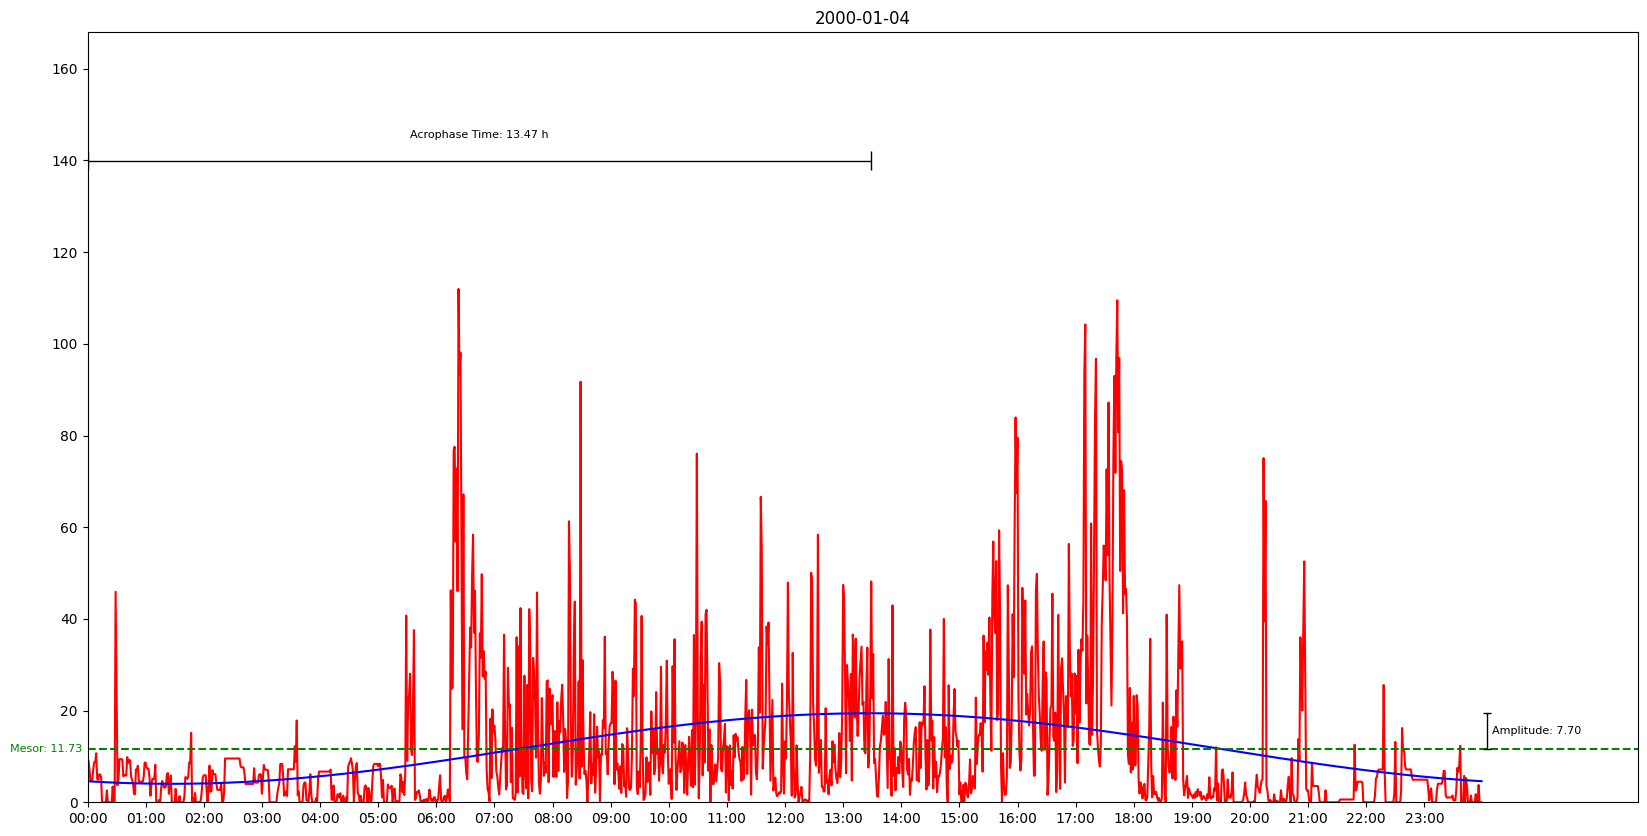

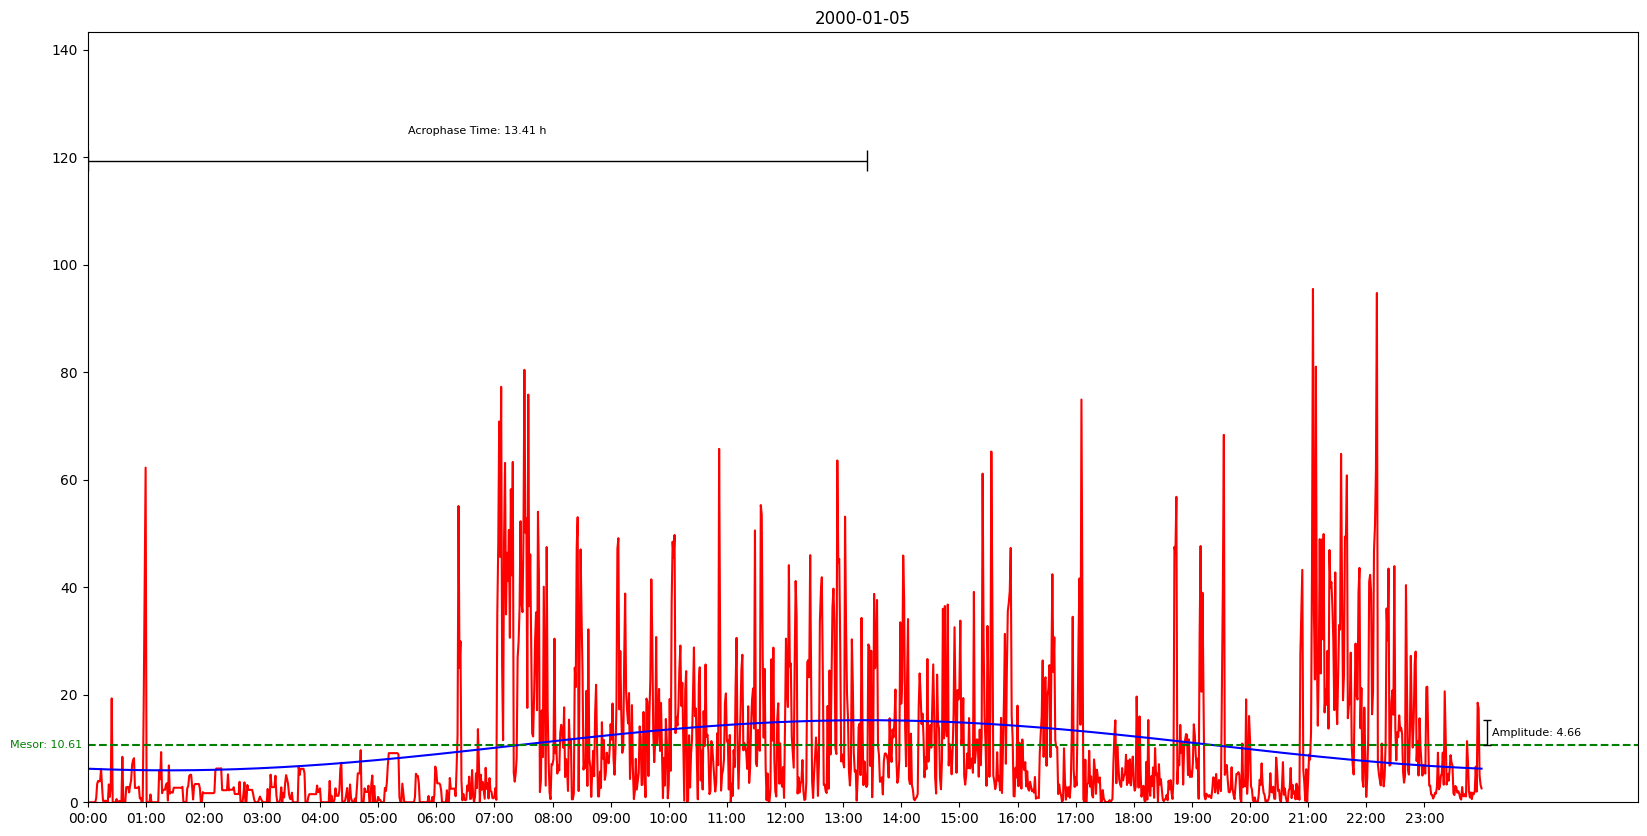

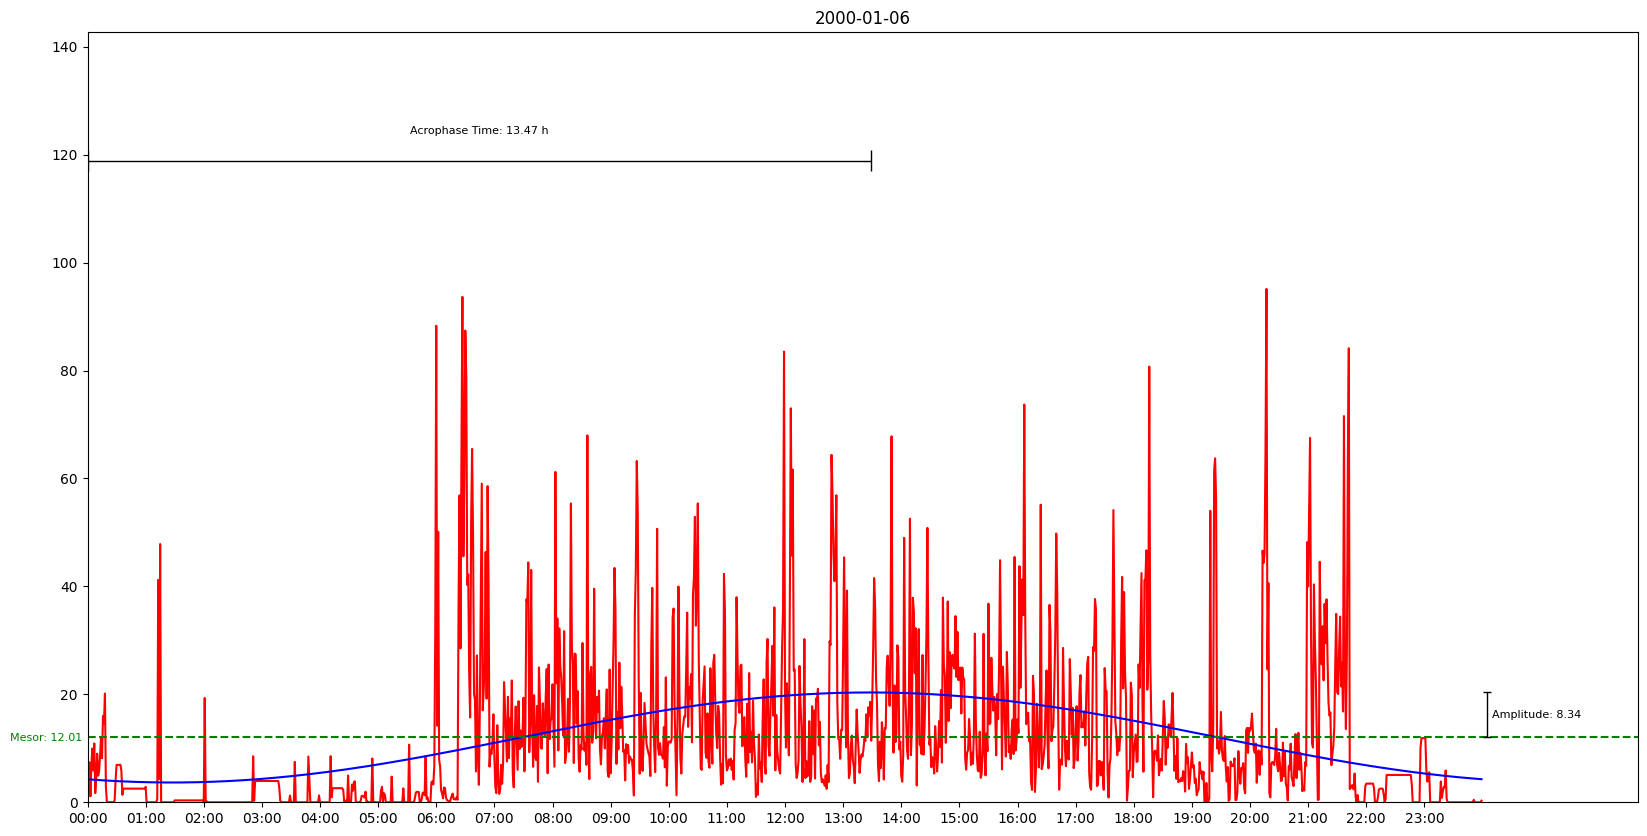

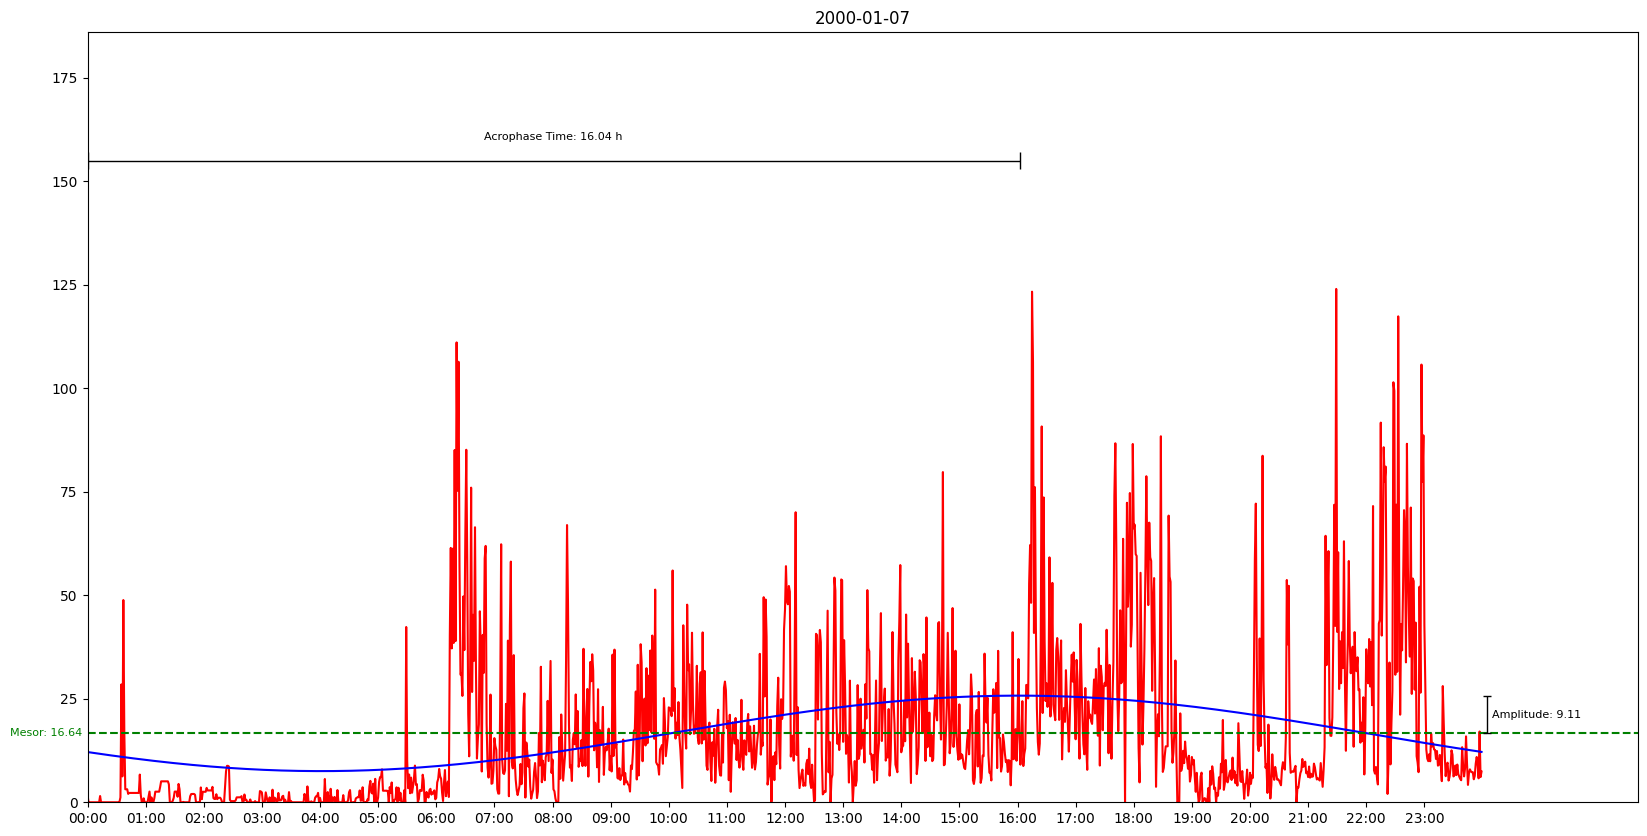

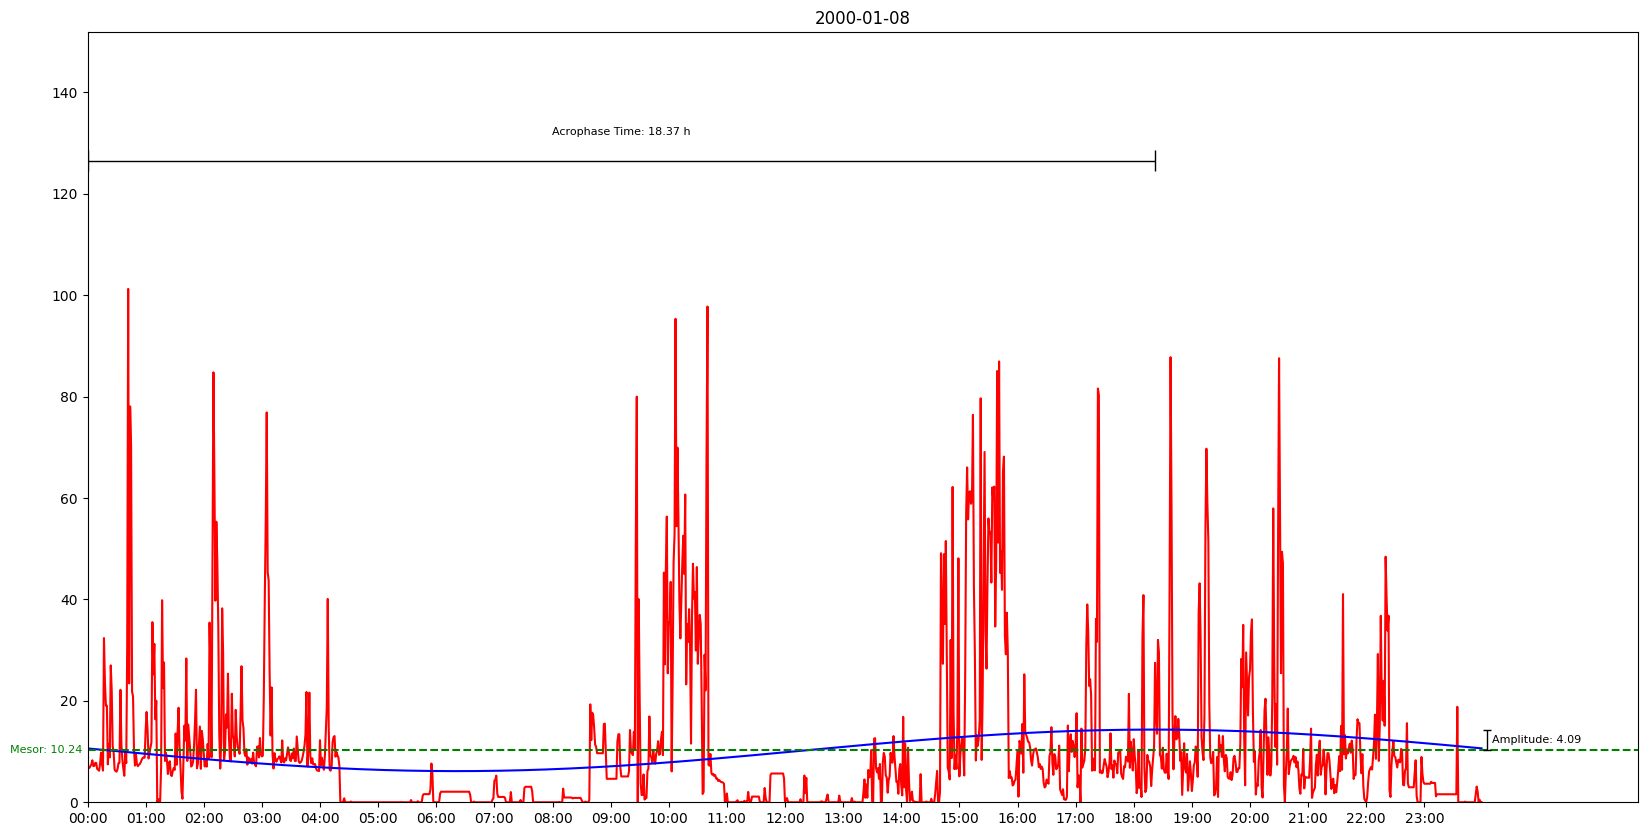

In [29]:
features.plot_cosinor()